## 1. Questions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

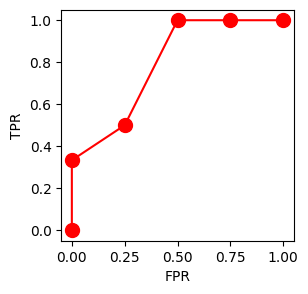

In [2]:
#x_coords = [0, 0, 0, 1/4, 1/4, 2/4, 2/4, 2/4, 3/4, 4/4]
#y_coords = [0, 1/6, 2/6, 2/6, 3/6, 4/6, 5/6, 6/6, 6/6, 6/6]
x_coords = [0, 0, 1/4, 2/4, 3/4, 4/4]
y_coords = [0, 2/6, 3/6, 6/6, 6/6, 6/6]

plt.figure(figsize=(3,3))
plt.scatter(x_coords, y_coords, label='O', color='red', marker='o', s=100)
plt.plot(x_coords, y_coords, color='red', linestyle='-')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## 2. Programming

In [3]:
def CalculateEuclideanDist(x,y):
    return np.sqrt(np.sum((x-y)**2))

def KNNClassifier(x_train, y_train, x_test, k = 1):
    distances = [CalculateEuclideanDist(x_train[i,:], x_test) for i in range(x_train.shape[0])]
    
    # find indices/labels of the first k nearest neighbors
    k_indices = np.argsort(distances)[:k]
    k_labels = y_train[k_indices]
    
    # predict labels
    counts = np.unique(k_labels, return_counts = True)
    pred_prob = (counts[1]/np.sum(counts[1]))
    if len(pred_prob)>1:
        pred_prob = pred_prob[1]
        pred_label = (pred_prob >= 0.5).astype(int)
    else:
        pred_label = counts[0][0]
        pred_prob = 0 if pred_label == 0 else 1
    
    return pred_prob, pred_label

In [4]:
def ComputeEvaluation(y_test, pred_labels):

    # compute accuracy, precision, recall

    contingency_table = pd.crosstab(y_test, pred_labels, rownames = ['true'], colnames = ['predicted'])
    contingency_table = np.array(contingency_table)
    
    accuracy = (contingency_table[0,0] + contingency_table[1,1]) / np.sum(contingency_table)
    precision = contingency_table[1,1] / np.sum(contingency_table[:,1])
    recall = contingency_table[1,1] / np.sum(contingency_table[1:,])
    
    return accuracy, precision, recall

In [5]:
data = np.loadtxt("hw3Data/D2z.txt", delimiter = " ")
x_train = data[:,0:2]
y_train = data[:,2]

x1 = np.arange(-2, 2.1, 0.1)
x2 = np.arange(-2, 2.1, 0.1)
x1_x1, x2_x2 = np.meshgrid(x1, x2)
x_test = np.c_[x1_x1.ravel(), x2_x2.ravel()]

knn_result = [KNNClassifier(x_train, y_train, x_test[i,:], k = 1) for i in range(x_test.shape[0])]
pred_labels = [x[1] for x in knn_result]

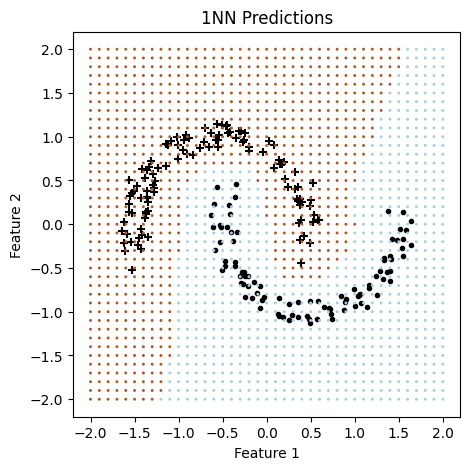

In [6]:
x1_label0 = []
x2_label0 = []
x1_label1 = []
x2_label1 = []

# Separate data points based on labels
for i in range(x_train.shape[0]):
    if y_train[i] == 0:
        x1_label0.append(x_train[i,0])
        x2_label0.append(x_train[i,1])
    else:
        x1_label1.append(x_train[i,0])
        x2_label1.append(x_train[i,1])

plt.figure(figsize=(5,5))
plt.scatter(x1_label0, x2_label0, c='black', marker='.')
plt.scatter(x1_label1, x2_label1, c='black', marker='+')

plt.scatter(x_test[:, 0], x_test[:, 1], c=pred_labels, cmap=plt.cm.Paired, marker='.', s=5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('1NN Predictions')

plt.show()

## Spam filter

In [7]:
data = pd.read_csv("hw3Data/emails.csv",)
data.set_index('Email No.', inplace = True)
data

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 1,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 2,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
Email 3,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
Email 4,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
Email 5,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Email 4996,20,6,3,1,1,1,34,0,0,15,...,0,0,0,0,0,0,0,1,0,0
Email 4997,0,7,1,0,0,0,20,1,1,0,...,0,0,0,1,0,0,0,0,0,0
Email 4998,6,8,1,3,2,1,64,7,1,16,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 5-fold CV, K-NN
test_idx = [np.arange(0,1000), np.arange(1000,2000), np.arange(2000,3000), np.arange(3000,4000), np.arange(4000,5000)]
k_list = [1,3,5,7,10]
accuracy_list, precision_list, recall_list = [], [], [] 

for k in k_list:
    accuracy, precision, recall = np.zeros(5), np.zeros(5), np.zeros(5)
    for j in range(5):
        #print("k:", k, "j:", j)
        x_test = data.iloc[test_idx[j],:-1]
        x_train = data.drop(x_test.index)[data.columns[:-1]]
        y_test = data.iloc[test_idx[j],-1]
        y_train = data.drop(y_test.index)[data.columns[-1]]

        knn_result = [KNNClassifier(np.array(x_train), np.array(y_train), np.array(x_test)[i,:], k = k) for i in range(x_test.shape[0])]
        pred_labels = [x[1] for x in knn_result]
        accuracy[j], precision[j], recall[j] = ComputeEvaluation(np.array(y_test), pred_labels)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)

In [ ]:
result_1nn = pd.DataFrame({"Fold": ["Fold1", "Fold2", "Fold3", "Fold4", "Fold5"], 
                           "Accuracy":accuracy_list[0], 
                           "Precision":np.round(precision_list[0], 3), 
                           "Recall":np.round(recall_list[0],3)})
result_1nn.set_index('Fold', inplace = True)
result_1nn

In [ ]:
plt.figure(figsize = (3,3))

plt.scatter(k_list, mean_accuracy)
plt.plot(k_list, mean_accuracy)

plt.xlabel('k')
plt.ylabel('Average accuracy')
plt.title('kNN 5-Fold Cross validation')
plt.show()

In [ ]:
# logistic regression

def sigmoid(x):
    return 1/(1+np.exp(-x))

def ComputeYhat(theta, x):
    yhat = sigmoid(np.dot(x, theta))
    bounded_yhat = np.maximum(0.01, np.minimum(0.99, yhat))
    return bounded_yhat
    
def Updatetheta(theta, yhat, y, x, eta):
    grad = np.dot( (yhat - y), x) 
    updated_theta = theta - eta * grad
    return updated_theta

def ComputeLoss(yhat, y, x):
    loss = - np.sum( y * np.log(yhat) + (1-y) * np.log(1-yhat) )
    return loss

def LogisticRegressionFit(x_train, y_train, eta = 0.1, n_iter = 1000):

    n, p = x_train.shape
    new_column = np.ones(n)
    x_train = np.insert(x_train, 0, new_column, axis = 1)

    # Initialize theta
    theta = np.random.uniform(-1, 1, (p+1))

    # Set initial loss
    #loss_old = 1000000
    #diff_loss = 1

    i = 0
    while i < n_iter: #and loss_old > 1 and diff_loss > 0.0001:
        yhat = ComputeYhat(theta, x_train)
        theta = Updatetheta(theta, yhat, y_train, x_train, eta)
        #loss = ComputeLoss(yhat, y_train, x_train)
        #diff_loss = abs(loss_old - loss)
        #loss_old = loss
        i += 1
        
    return theta    

def LogisticPrediction(fit, x_test):
    n, p = x_test.shape
    new_column = np.ones(n)
    x_test = np.insert(x_test, 0, new_column, axis = 1)
    pred_prob = ComputeYhat(fit, x_test)
    pred_labels = (pred_prob >= 0.5).astype(int)
    return pred_prob, pred_labels

In [ ]:
# 5-fold CV, logistic regression
test_idx = [np.arange(0,1000), np.arange(1000,2000), np.arange(2000,3000), np.arange(3000,4000), np.arange(4000,5000)]

accuracy, precision, recall = np.zeros(5), np.zeros(5), np.zeros(5)
for j in range(5):
    print("j:", j)
    x_test = data.iloc[test_idx[j],:-1]
    x_train = np.array(data.drop(x_test.index)[data.columns[:-1]])
    y_test = data.iloc[test_idx[j],-1]
    y_train = np.array(data.drop(y_test.index)[data.columns[-1]])
    x_test, y_test = np.array(x_test), np.array(y_test)

    fit = LogisticRegressionFit(x_train, y_train, eta = 0.01, n_iter = 1000)
    pred_labels = LogisticPrediction(fit, x_test)[1]
    accuracy[j], precision[j], recall[j] = ComputeEvaluation(np.array(y_test), pred_labels)

In [ ]:
result_lr = pd.DataFrame({"Fold": ["Fold1", "Fold2", "Fold3", "Fold4", "Fold5"], 
                           "Accuracy":accuracy, 
                           "Precision":np.round(precision, 3), 
                           "Recall":np.round(recall,3)})
result_lr.set_index('Fold', inplace = True)
result_lr

In [ ]:
# single split
j = 4
x_test = data.iloc[test_idx[j],:-1]
x_train = np.array(data.drop(x_test.index)[data.columns[:-1]])
y_test = data.iloc[test_idx[j],-1]
y_train = np.array(data.drop(y_test.index)[data.columns[-1]])
x_test, y_test = np.array(x_test), np.array(y_test)

# knn
knn_result = [KNNClassifier(x_train, y_train, x_test[i,:], k = 5) for i in range(x_test.shape[0])]
pred_prob = [x[0] for x in knn_result]

# logistic
fit = LogisticRegressionFit(x_train, y_train, eta = 0.01, n_iter = 1000)
pred_prob2 = LogisticPrediction(fit, x_test)[0]

In [ ]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_prob)
roc_auc1 = metrics.auc(fpr1, tpr1)

fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, pred_prob2)
roc_auc2 = metrics.auc(fpr2, tpr2)

plt.figure(figsize=(5, 5))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='KNeighborsClassifier (AUC = {:.2f})'.format(roc_auc1))
plt.plot(fpr2, tpr2, color='blue', lw=2, label='LogisticRegression (AUC = {:.2f})'.format(roc_auc2))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()